# COVID-19 analysis

- <https://github.com/Kamaropoulos/covid19py>

Note that the JHU data source is not providing recovery data at this time ([reference](https://github.com/ExpDev07/coronavirus-tracker-api/blob/master/README.md#recovered-cases-showing-0)).

Another source of data might be the following: <https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data>

## data sources (acquired reliably from CERN)

```Bash
mkdir COVID19
cd COVID19
virtualenv -p python3.6 COVID19
source COVID19/bin/activate
pip3.6 install pip --upgrade
pip3.6 install jupyter matplotlib numpy pandas requests seaborn
pip3.6 install COVID19Py
python3.6
```

```Python
import COVID19Py
import numpy as np
import pandas as pd

import json
import pickle
from uuid import uuid4

def uuid4_short():
    return str(uuid4()).split('-')[0]

def new_filename(ext='.pkl', verbose=True):
    filename = uuid4_short()+ext
    if verbose:
        print(filename)
    return filename

covid19 = COVID19Py.COVID19()
data = covid19.getAll(timelines=True)

with open(new_filename(), 'wb') as f:
    pickle.dump(data, f)
```

In [1]:
import json
import pickle
from uuid import uuid4
import warnings

import COVID19Py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.labelcolor'] = (1, 1, 1, 0)
pd.set_option("display.max_rows"   , 1000)
pd.set_option("display.max_columns", 1000)
sns.set_palette('husl')
sns.set(style='ticks')
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = [13, 6]
sns.set()

In [3]:
def uuid4_short():
    return str(uuid4()).split('-')[0]
def new_filename(ext='.pkl', verbose=True):
    filename = uuid4_short()+ext
    if verbose: print(filename)
    return filename

In [4]:
%%time
if 0:
    covid19 = COVID19Py.COVID19(data_source='jhu') # https://github.com/CSSEGISandData/COVID-19
    with open(new_filename(), 'wb') as f:
        pickle.dump(data, f)
    data = covid19.getAll(timelines=True)
    with open(new_filename(), 'wb') as f:
        pickle.dump(data, f)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.58 µs


In [5]:
if 1:
    #with open('12338731.pkl', 'rb') as f:
    #    covid19 = pickle.load(f)
    with open('c3733293.pkl', 'rb') as f:
        data = pickle.load(f)
    # records:
    # 2020-04-19T1002Z data: c3733293.pkl
    # 2020-04-18T0918Z data: 289efaac.pkl
    # 2020-04-17T0818Z data: 13921a54.pkl
    # 2020-04-16T0745Z data: a0c99473.pkl
    # 2020-04-14T0844Z data: ad724da4.pkl
    # 2020-04-13T2005Z data: 65882db6.pkl
    # 2020-04-12T0527z data: d5fb657f.pkl
    # 2020-04-11T2322Z data: 2ed0a4f8.pkl
    # 2020-04-10T1904Z covid19: 12338731.pkl, data: 7a48429f.pkl
    # 2020-04-09T0544Z covid19: 7f150185.pkl, data: 5f3d2ff9.pkl
    # 2020-04-08T0616Z covid19: 8f0ec81a.pkl, data: 741cd4d4.pkl
    # 2020-04-07       covid19: f94e6997.pkl, data: 120141ce.pkl

#latest = covid19.getLatest()
#locations = covid19.getLocations(timelines=True)

df = pd.DataFrame(data['locations'])
df.head()
#df

,id,country,country_code,country_population,province,last_updated,coordinates,latest,timelines
0,0,Afghanistan,AF,37172386.0,,2020-04-19T09:48:51.129323Z,"{'latitude': '33.0', 'longitude': '65.0'}","{'confirmed': 933, 'deaths': 30, 'recovered': 0}","{'confirmed': {'latest': 933, 'timeline': {'20..."
1,1,Albania,AL,2866376.0,,2020-04-19T09:48:51.135525Z,"{'latitude': '41.1533', 'longitude': '20.1683'}","{'confirmed': 548, 'deaths': 26, 'recovered': 0}","{'confirmed': {'latest': 548, 'timeline': {'20..."
2,2,Algeria,DZ,42228429.0,,2020-04-19T09:48:51.141481Z,"{'latitude': '28.0339', 'longitude': '1.6596'}","{'confirmed': 2534, 'deaths': 367, 'recovered'...","{'confirmed': {'latest': 2534, 'timeline': {'2..."
3,3,Andorra,AD,77006.0,,2020-04-19T09:48:51.146953Z,"{'latitude': '42.5063', 'longitude': '1.5218'}","{'confirmed': 704, 'deaths': 35, 'recovered': 0}","{'confirmed': {'latest': 704, 'timeline': {'20..."
4,4,Angola,AO,30809762.0,,2020-04-19T09:48:51.153523Z,"{'latitude': '-11.2027', 'longitude': '17.8739'}","{'confirmed': 24, 'deaths': 2, 'recovered': 0}","{'confirmed': {'latest': 24, 'timeline': {'202..."


In [6]:
print(list(dict.fromkeys(list(df['country'].values))))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan'

In [7]:
locations = {}

def process(location):
    location = location['timelines'].values[0]

    confirmed = pd.DataFrame(list(location['confirmed']['timeline'].items()), columns=['datetime', 'confirmed'])
    deaths    = pd.DataFrame(list(location['deaths']['timeline'].items()),    columns=['datetime', 'deaths'])
    recovered = pd.DataFrame(list(location['recovered']['timeline'].items()), columns=['datetime', 'recovered'])

    confirmed.index = pd.to_datetime(confirmed['datetime']); del confirmed['datetime']
    deaths.index    = pd.to_datetime(deaths['datetime'])   ; del deaths['datetime']
    recovered.index = pd.to_datetime(recovered['datetime']); del recovered['datetime']

    # merge
    location = confirmed
    location['deaths']       = deaths['deaths']
    location['recovered']    = recovered['recovered']

    # visual estimate of changes (with linear interpolation)
    half_mean_of_confirmed_cases = location['confirmed'].mean()/2
    half_mean_of_deaths_cases    = location['deaths'].mean()/2
    location['confirmed_percentage_change']                                     = location['confirmed'].pct_change().replace(0, np.nan).interpolate(method='nearest')
    location['confirmed_percentage_change']                                     = 100*location['confirmed_percentage_change']
    location['confirmed_percentage_change_by_half_mean_confirmed_cases_factor'] = half_mean_of_confirmed_cases*location['confirmed_percentage_change']
    location['deaths_percentage_change']                                        = location['deaths'].pct_change().replace(0, np.nan).interpolate(method='nearest')
    location['deaths_percentage_change']                                        = 100*location['deaths_percentage_change']
    location['deaths_percentage_change_by_half_mean_deaths_cases_factor']       = half_mean_of_confirmed_cases*location['deaths_percentage_change']    
    
    # reindex to first confirmed case
    location = location.query('confirmed > 0').reset_index(); del location['datetime']

    display(location.tail())

    #plots
    df_plot = location.drop([
        'confirmed_percentage_change',
        'confirmed_percentage_change_by_half_mean_confirmed_cases_factor',
        'deaths_percentage_change',
        'deaths_percentage_change_by_half_mean_deaths_cases_factor'], axis=1)
    df_plot.plot(title=location_name+' confirmed cases and deaths (linear scale)')                   ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
    df_plot.plot(title=location_name+' confirmed cases and deaths (log scale)', logy=True)           ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

    df_plot = location[['confirmed_percentage_change', 'deaths_percentage_change']]
    df_plot.plot(title=location_name+' percentage change in cases and deaths (linear scale)')        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
    df_plot.plot(title=location_name+' percentage change in cases and deaths (log scale)', logy=True); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

    return location

# South Korea

,confirmed,deaths,recovered,confirmed_percentage_change,confirmed_percentage_change_by_half_mean_confirmed_cases_factor,deaths_percentage_change,deaths_percentage_change_by_half_mean_deaths_cases_factor
83,10564,222,NaN,0.256240,646.215231,2.304147,5810.863532
84,10591,225,NaN,0.255585,644.563602,1.351351,3407.992936
85,10613,229,NaN,0.207724,523.861061,1.777778,4483.404040
86,10635,230,NaN,0.207293,522.775134,0.436681,1101.272827
87,10653,232,NaN,0.169252,426.840300,0.869565,2192.969368


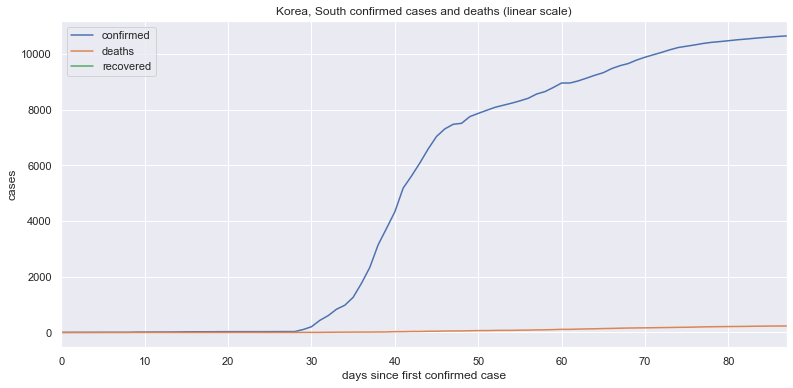

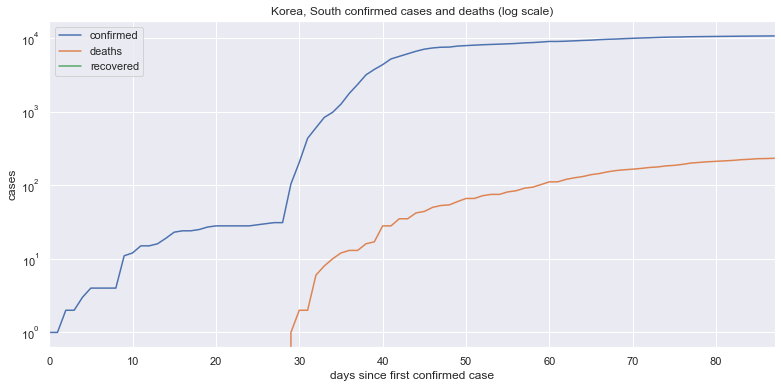

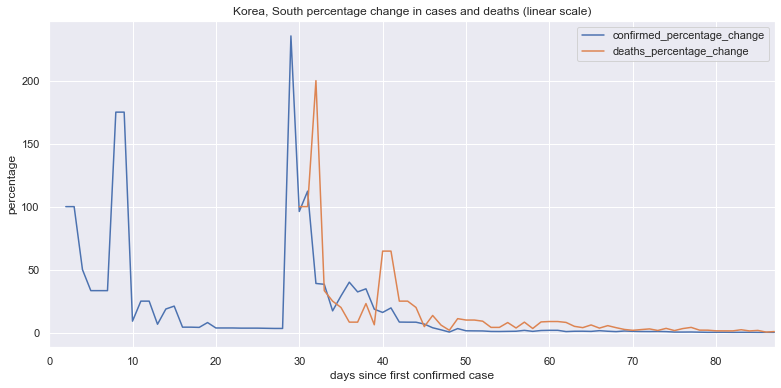

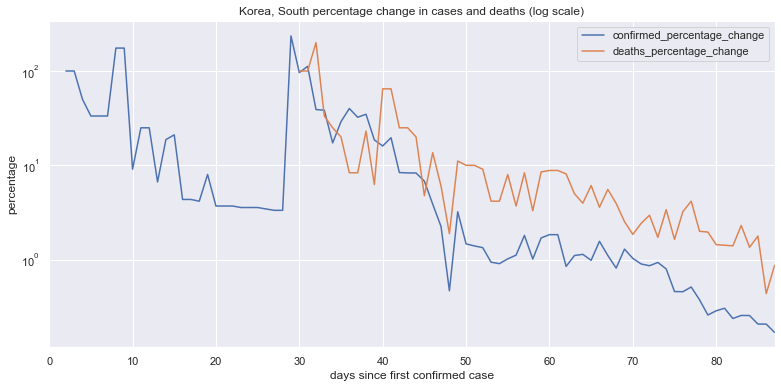

In [8]:
location_name = 'Korea, South'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Belgium

,confirmed,deaths,recovered,confirmed_percentage_change,confirmed_percentage_change_by_half_mean_confirmed_cases_factor,deaths_percentage_change,deaths_percentage_change_by_half_mean_deaths_cases_factor
70,31119,4157,NaN,1.732649,5437.918860,6.507815,20424.775813
71,33573,4440,NaN,7.885858,24749.763810,6.807794,21366.261727
72,34809,4857,NaN,3.681530,11554.481280,9.391892,29476.452703
73,36138,5163,NaN,3.817978,11982.724295,6.300185,19773.131563
74,37183,5453,NaN,2.891693,9075.578339,5.616889,17628.607399


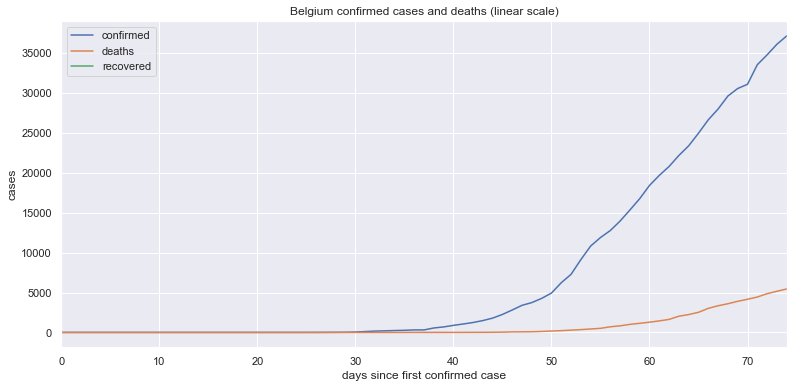

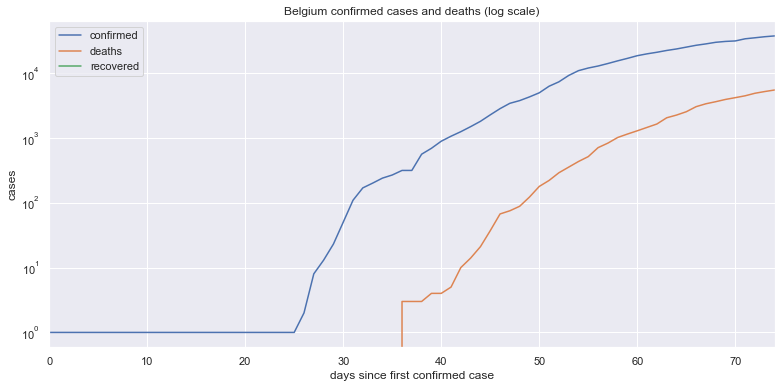

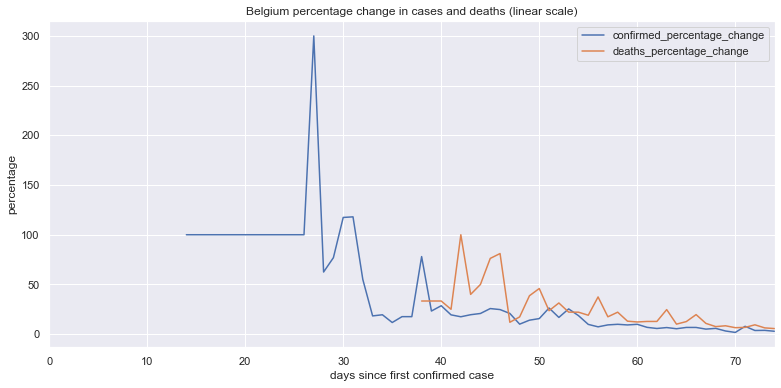

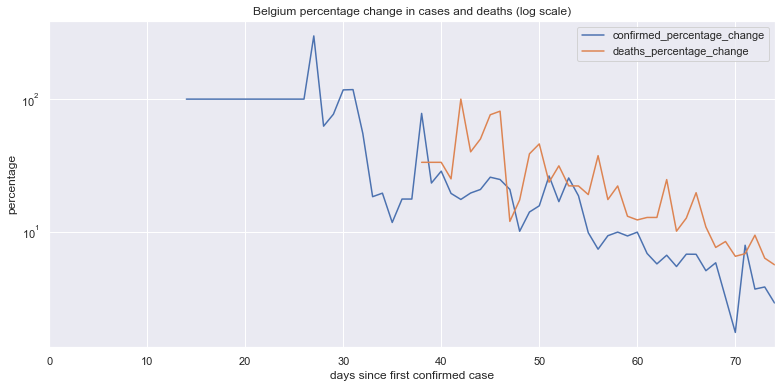

In [9]:
location_name = 'Belgium'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Switzerland

,confirmed,deaths,recovered,confirmed_percentage_change,confirmed_percentage_change_by_half_mean_confirmed_cases_factor,deaths_percentage_change,deaths_percentage_change_by_half_mean_deaths_cases_factor
49,25936,1174,NaN,0.965431,3172.928463,3.163445,10396.786627
50,26336,1239,NaN,1.542258,5068.691815,5.536627,18196.344568
51,26732,1281,NaN,1.503645,4941.789755,3.389831,11140.812789
52,27078,1327,NaN,1.294329,4253.863390,3.590945,11801.782166
53,27404,1368,NaN,1.203929,3956.761821,3.089676,10154.342930


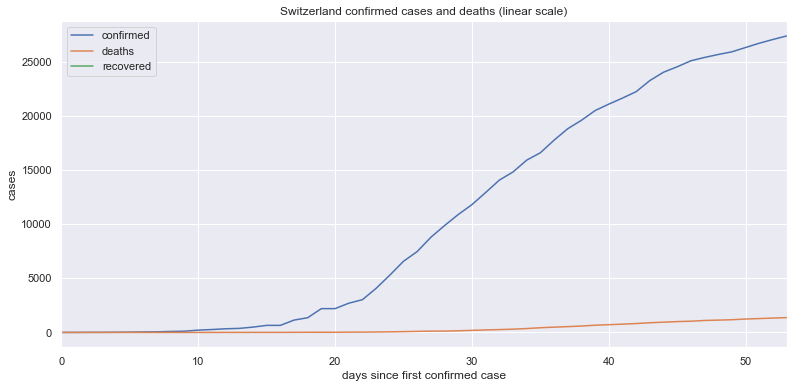

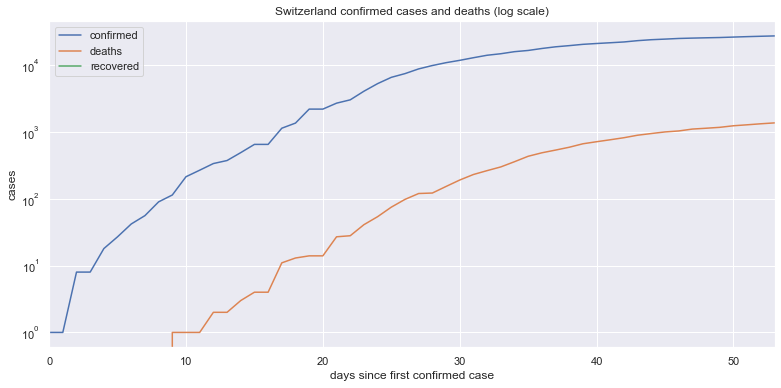

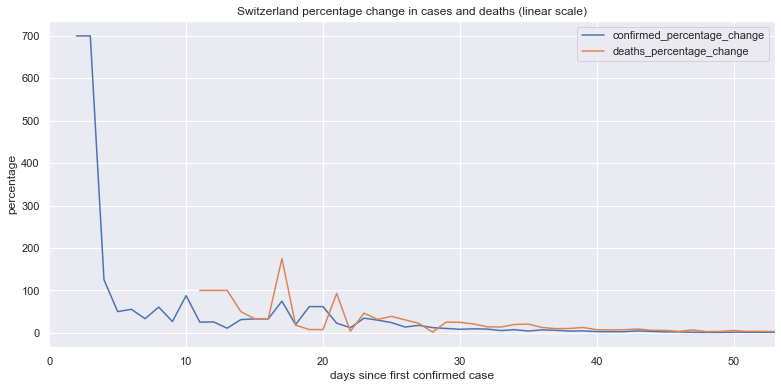

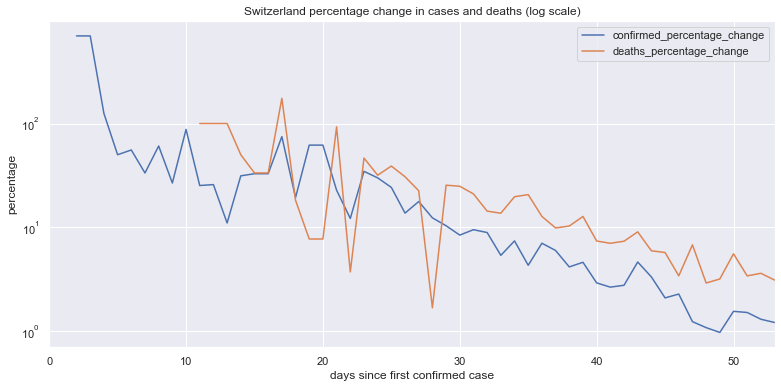

In [10]:
location_name = 'Switzerland'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Greece

,confirmed,deaths,recovered,confirmed_percentage_change,confirmed_percentage_change_by_half_mean_confirmed_cases_factor,deaths_percentage_change,deaths_percentage_change_by_half_mean_deaths_cases_factor
48,2170,101,NaN,1.165501,319.148654,2.020202,553.191001
49,2192,102,NaN,1.013825,277.615207,0.990099,271.118362
50,2207,105,NaN,0.684307,187.383357,2.941176,805.381016
51,2224,108,NaN,0.770276,210.924435,2.857143,782.370130
52,2235,110,NaN,0.494604,135.437275,1.851852,507.091751


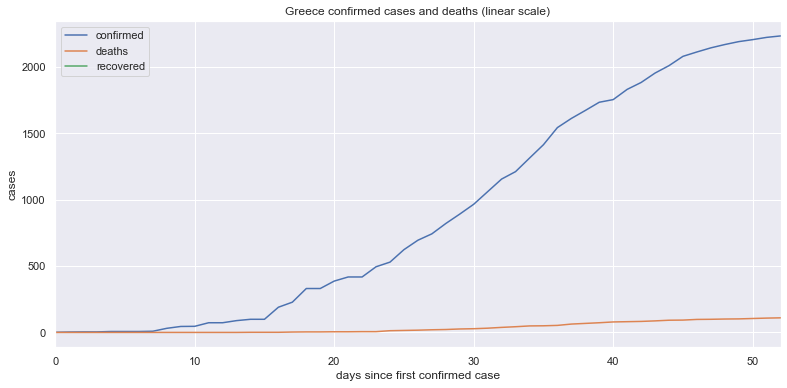

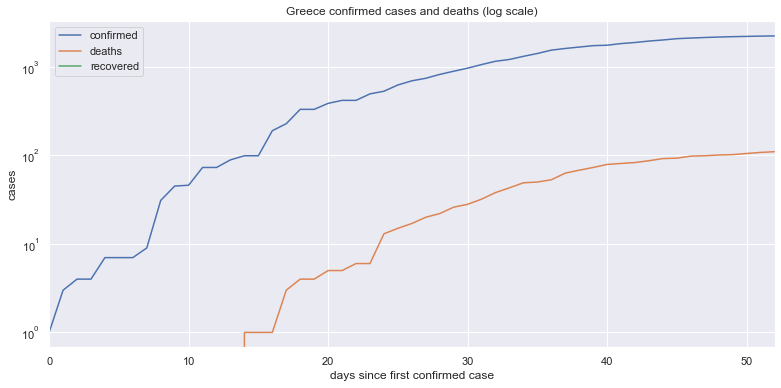

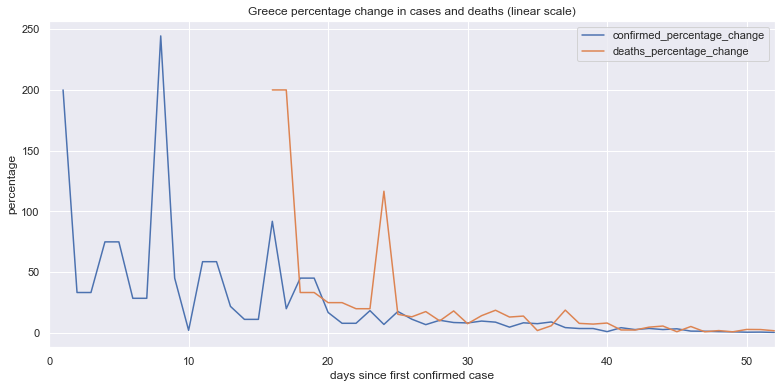

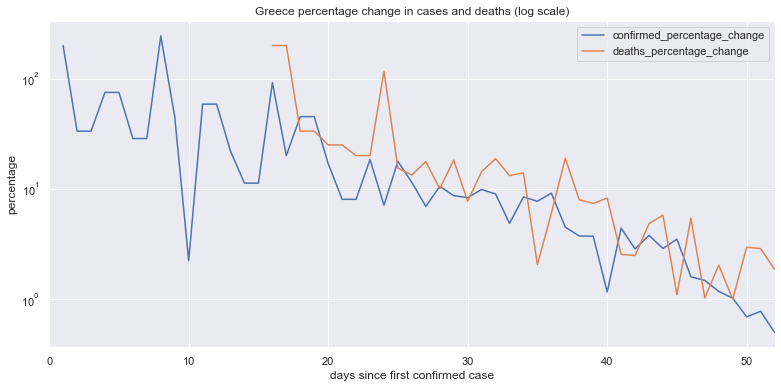

In [11]:
location_name = 'Greece'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Norway

,confirmed,deaths,recovered,confirmed_percentage_change,confirmed_percentage_change_by_half_mean_confirmed_cases_factor,deaths_percentage_change,deaths_percentage_change_by_half_mean_deaths_cases_factor
48,6623,139,NaN,0.302893,279.519984,3.731343,3443.415027
49,6740,150,NaN,1.766571,1630.253987,7.913669,7303.012590
50,6896,152,NaN,2.314540,2135.939102,1.333333,1230.446970
51,6937,161,NaN,0.594548,548.669436,5.921053,5464.155951
52,7036,164,NaN,1.427130,1317.005730,1.863354,1719.568746


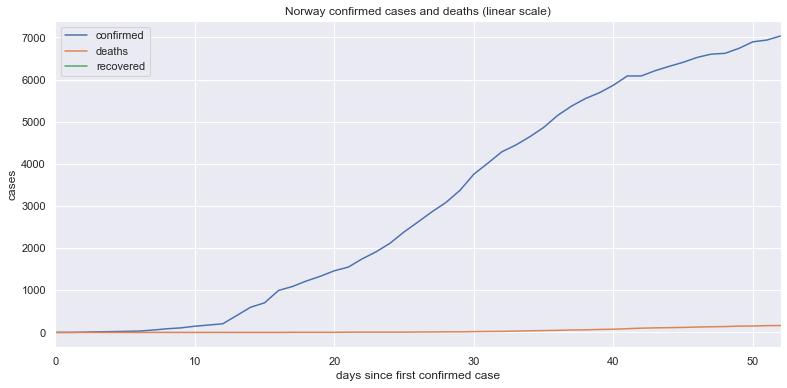

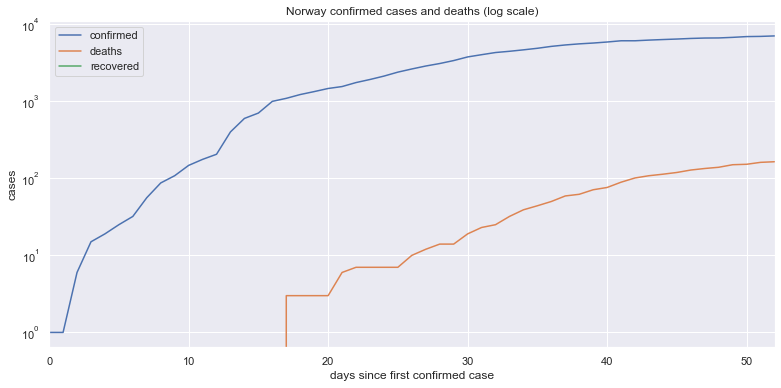

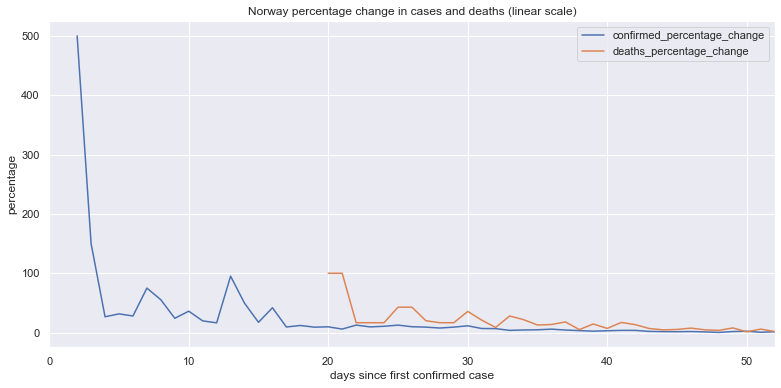

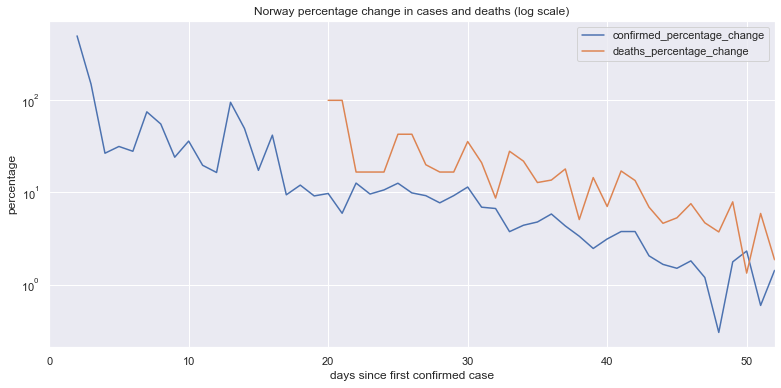

In [12]:
location_name = 'Norway'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Austria

,confirmed,deaths,recovered,confirmed_percentage_change,confirmed_percentage_change_by_half_mean_confirmed_cases_factor,deaths_percentage_change,deaths_percentage_change_by_half_mean_deaths_cases_factor
49,14226,384,NaN,1.317570,2401.495863,4.347826,7924.654150
50,14336,393,NaN,0.773232,1409.347322,2.343750,4271.883878
51,14476,410,NaN,0.976562,1779.951616,4.325700,7884.325121
52,14595,431,NaN,0.822050,1498.326776,5.121951,9335.629157
53,14671,443,NaN,0.520726,949.112398,2.784223,5074.720523


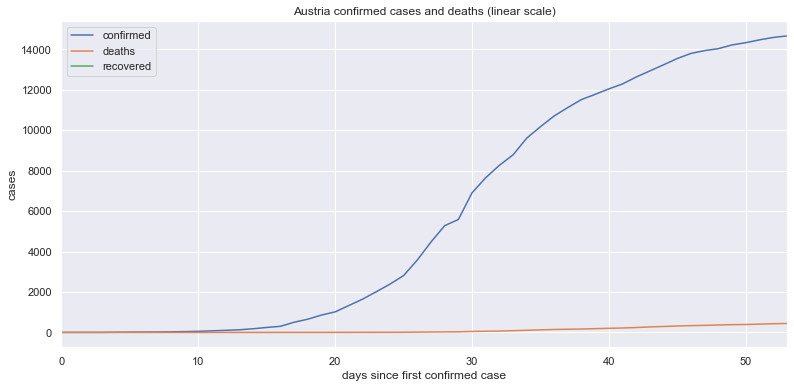

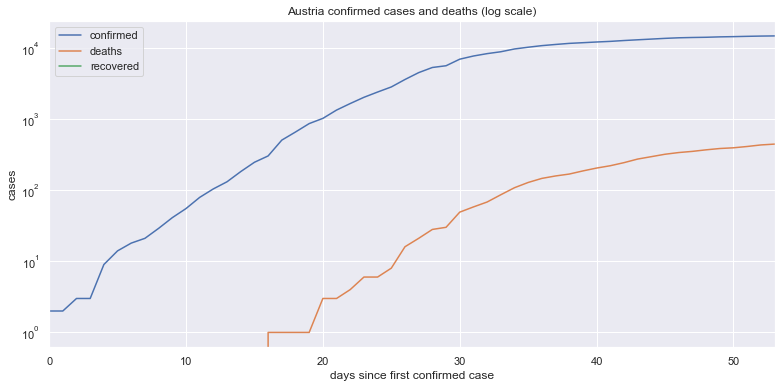

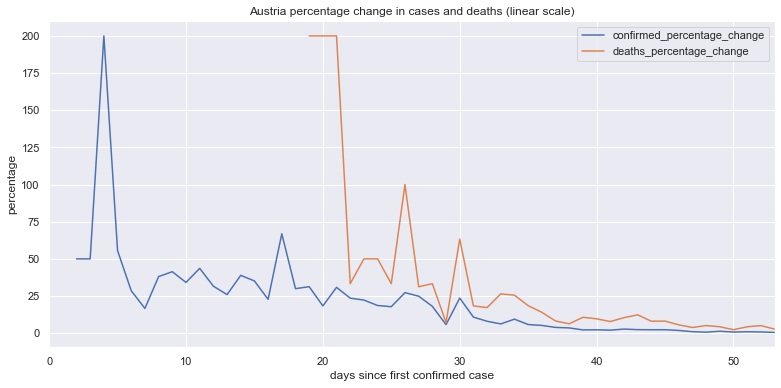

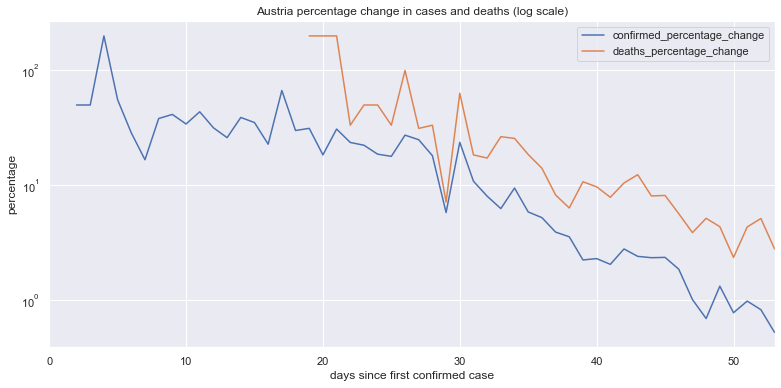

In [13]:
location_name = 'Austria'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Sweden

,confirmed,deaths,recovered,confirmed_percentage_change,confirmed_percentage_change_by_half_mean_confirmed_cases_factor,deaths_percentage_change,deaths_percentage_change_by_half_mean_deaths_cases_factor
74,11445,1033,NaN,4.539642,5429.927633,12.404788,14837.535859
75,11927,1203,NaN,4.211446,5037.368045,16.456922,19684.348324
76,12540,1333,NaN,5.139599,6147.544723,10.806318,12925.583768
77,13216,1400,NaN,5.390750,6447.949108,5.026257,6011.974016
78,13822,1511,NaN,4.585351,5484.600966,7.928571,9483.472403


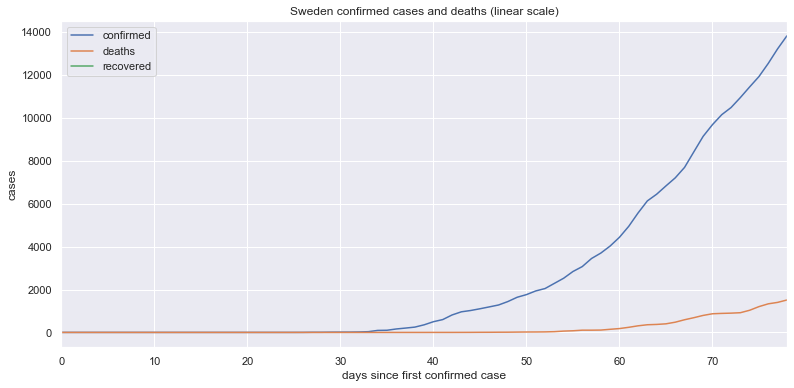

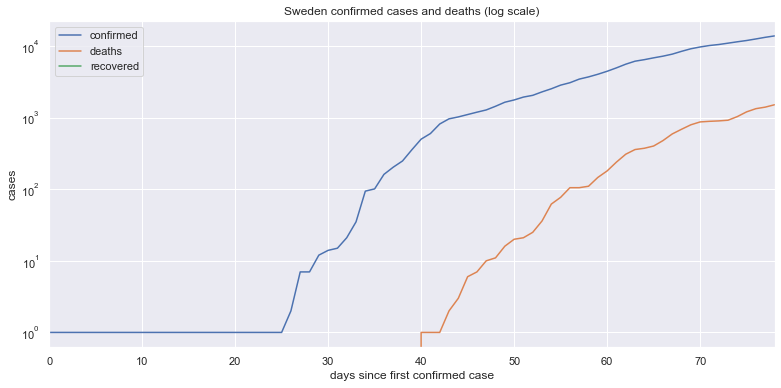

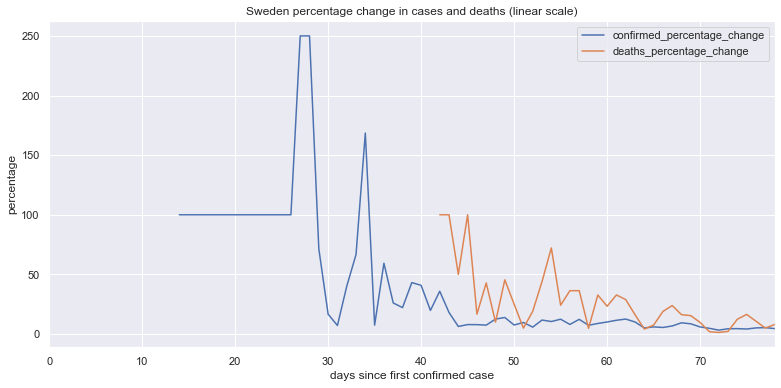

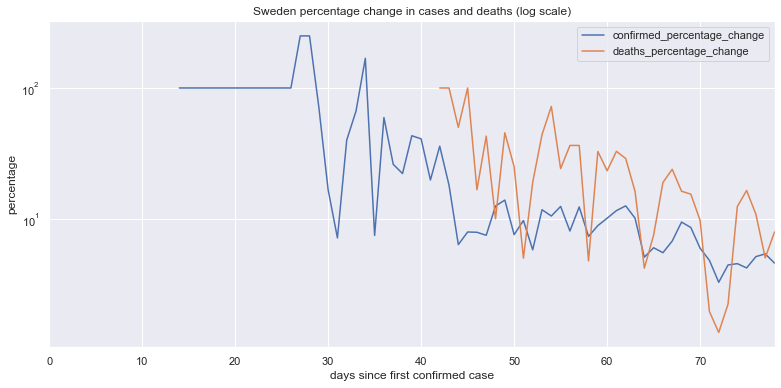

In [14]:
location_name = 'Sweden'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Ireland

,confirmed,deaths,recovered,confirmed_percentage_change,confirmed_percentage_change_by_half_mean_confirmed_cases_factor,deaths_percentage_change,deaths_percentage_change_by_half_mean_deaths_cases_factor
45,11479,406,NaN,7.814408,7616.872017,11.232877,10948.927460
46,12547,444,NaN,9.303946,9068.757375,9.359606,9123.009964
47,13271,486,NaN,5.770304,5624.439562,9.459459,9220.339373
48,13980,530,NaN,5.342476,5207.426780,9.053498,8824.639918
49,14758,571,NaN,5.565093,5424.416293,7.735849,7540.299099


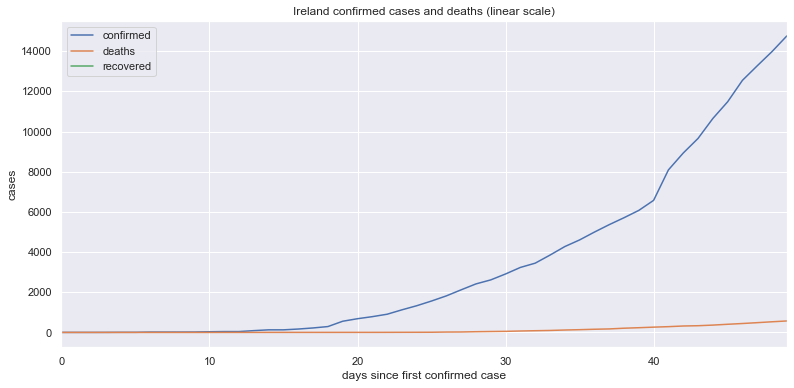

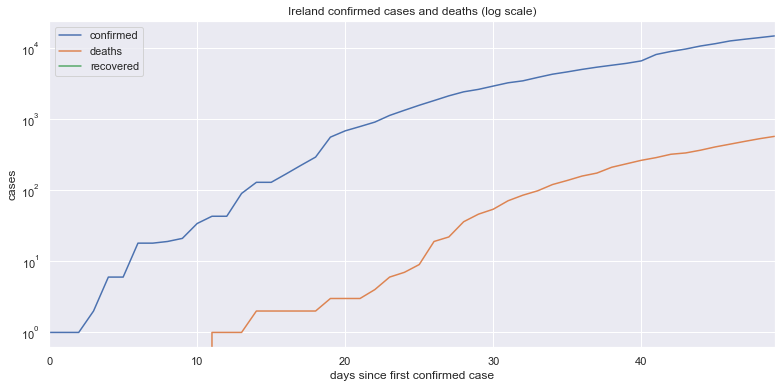

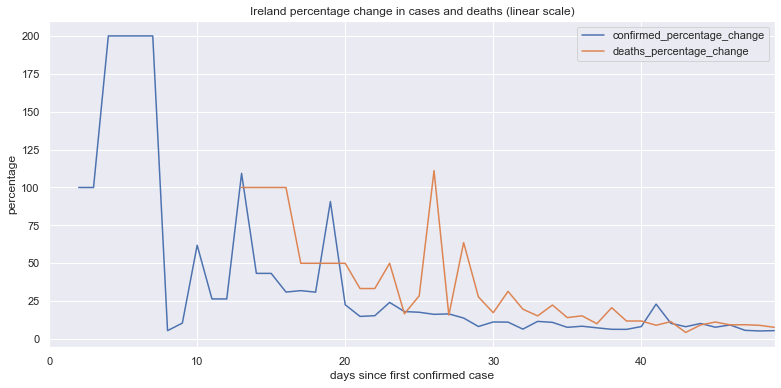

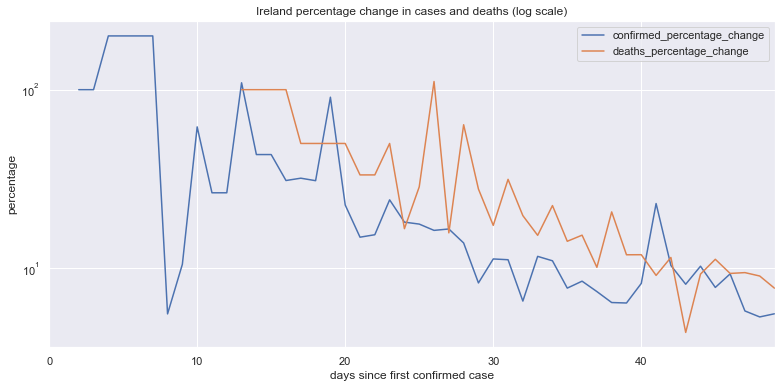

In [15]:
location_name = 'Ireland'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# United Kingdom (approximate)

,confirmed,deaths,recovered,confirmed_percentage_change,confirmed_percentage_change_by_half_mean_confirmed_cases_factor,deaths_percentage_change,deaths_percentage_change_by_half_mean_deaths_cases_factor
74,93873,12107,NaN,5.926361,48201.716964,6.867332,55855.051597
75,98476,12868,NaN,4.903433,39881.796646,6.285620,51123.732232
76,103093,13729,NaN,4.688452,38133.258023,6.691016,54421.002328
77,108692,14576,NaN,5.431019,44172.881161,6.169422,50178.646478
78,114217,15464,NaN,5.083171,41343.680841,6.092206,49550.614335


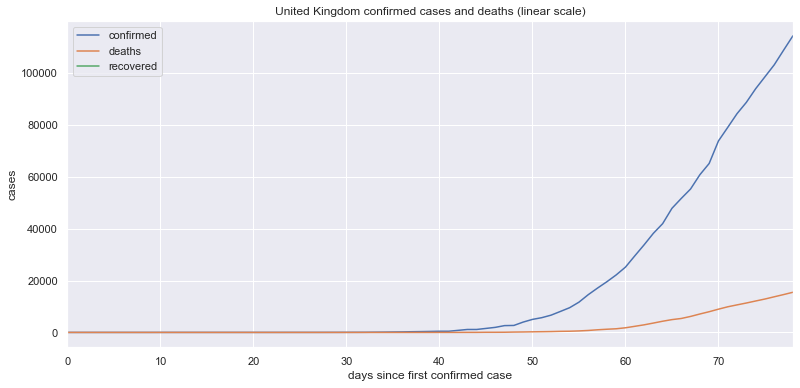

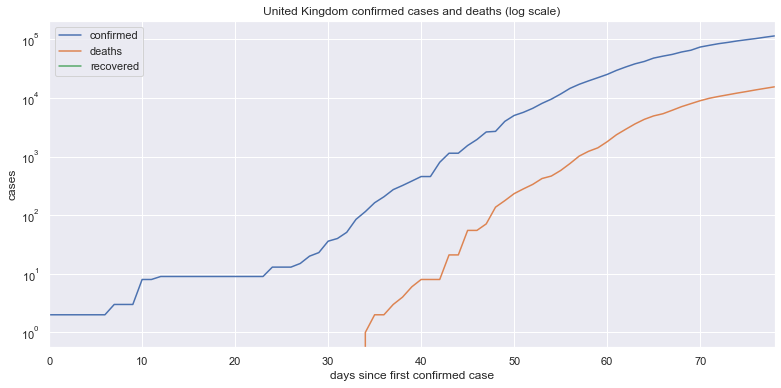

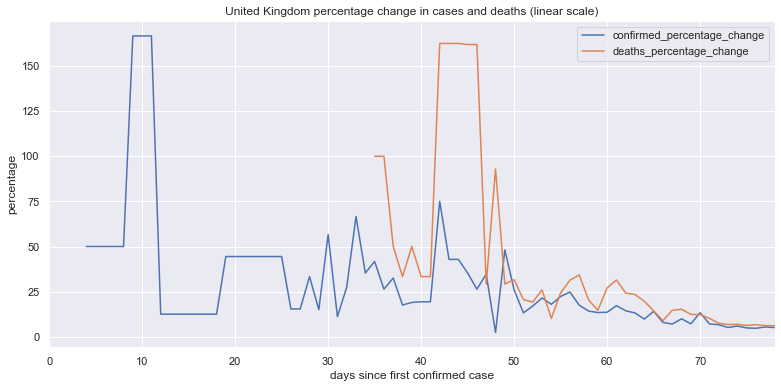

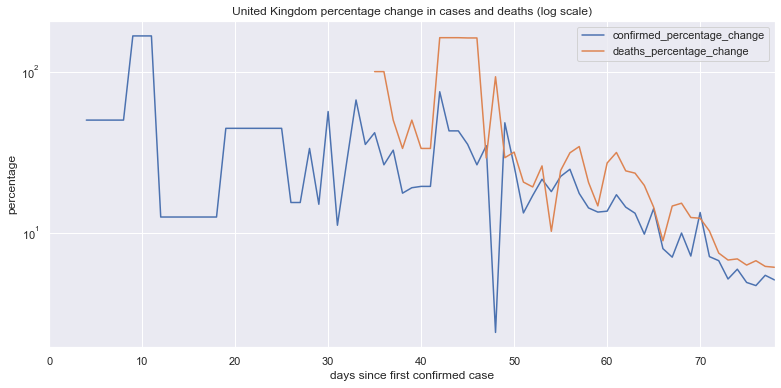

In [16]:
location_name = 'United Kingdom'
#location = df.query('country == @location_name')
location = df.query('country in ["United Kingdom"] and province == ""')
location = process(location)
locations[location_name] = location

# Germany

,confirmed,deaths,recovered,confirmed_percentage_change,confirmed_percentage_change_by_half_mean_confirmed_cases_factor,deaths_percentage_change,deaths_percentage_change_by_half_mean_deaths_cases_factor
78,131359,3294,NaN,0.989452,15037.792626,3.130870,47583.288268
79,134753,3804,NaN,2.583759,39268.233706,15.482696,235307.594386
80,137698,4052,NaN,2.185480,33215.150084,6.519453,99083.316605
81,141397,4352,NaN,2.686314,40826.867715,7.403751,112522.968456
82,143342,4459,NaN,1.375560,20905.895401,2.458640,37366.657702


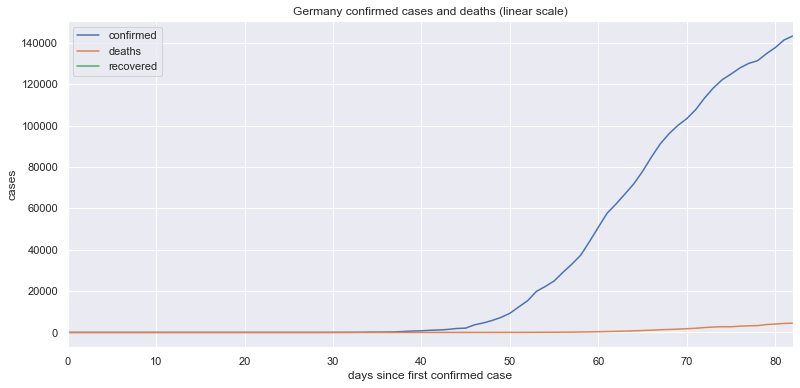

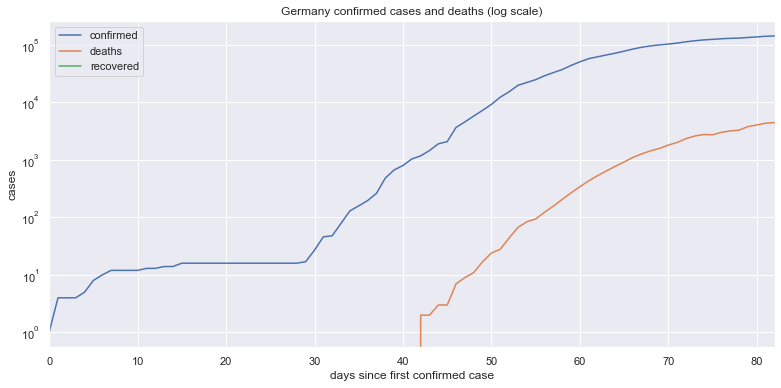

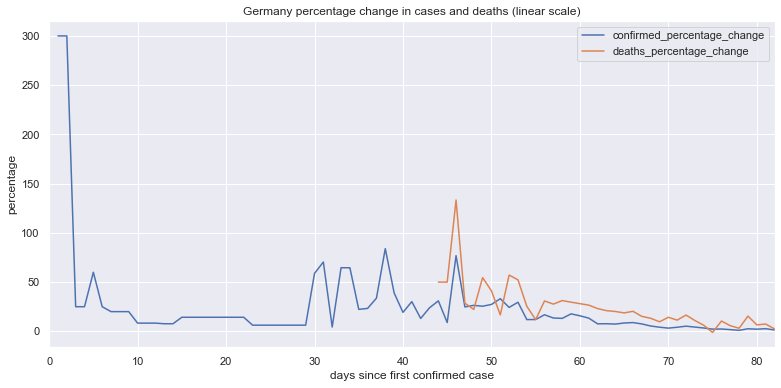

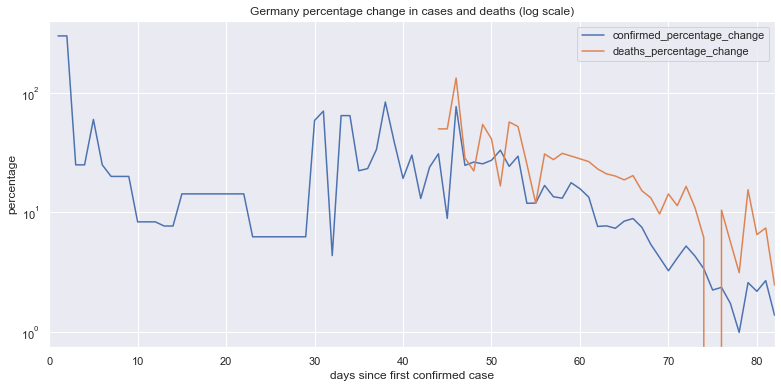

In [17]:
location_name = 'Germany'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Italy

,confirmed,deaths,recovered,confirmed_percentage_change,confirmed_percentage_change_by_half_mean_confirmed_cases_factor,deaths_percentage_change,deaths_percentage_change_by_half_mean_deaths_cases_factor
74,162488,21067,NaN,1.863136,40461.417222,2.941608,63882.408047
75,165155,21645,NaN,1.641352,35644.970429,2.743627,59582.905783
76,168941,22170,NaN,2.292392,49783.499240,2.425502,52674.236518
77,172434,22745,NaN,2.067586,44901.418512,2.593595,56324.674135
78,175925,23227,NaN,2.024543,43966.660739,2.119147,46021.167639


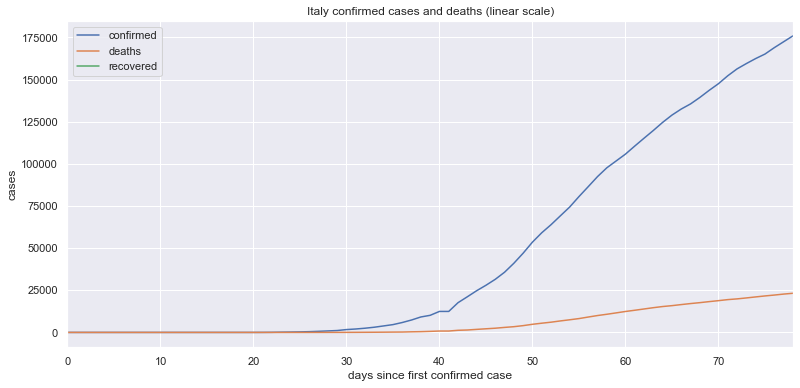

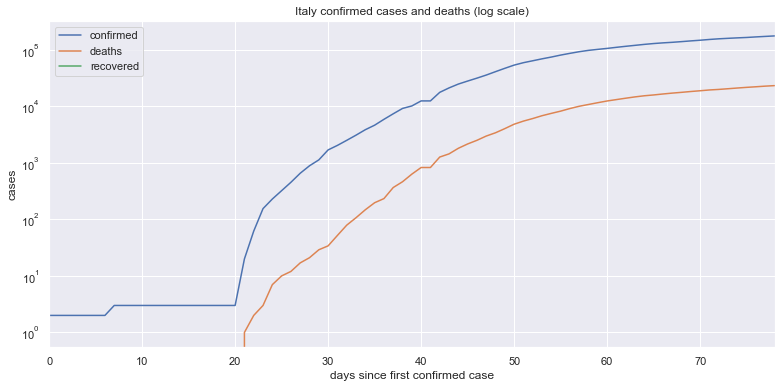

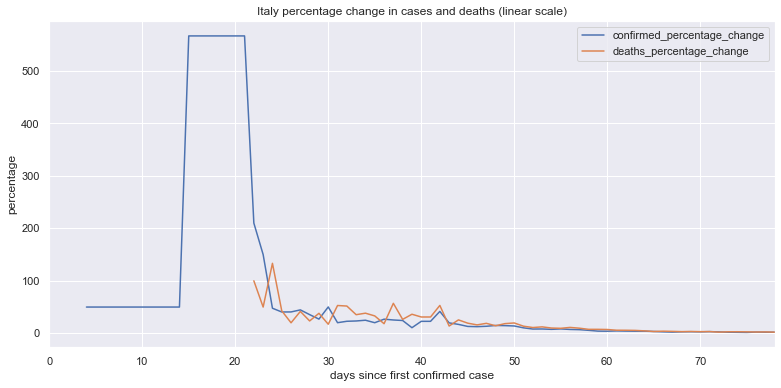

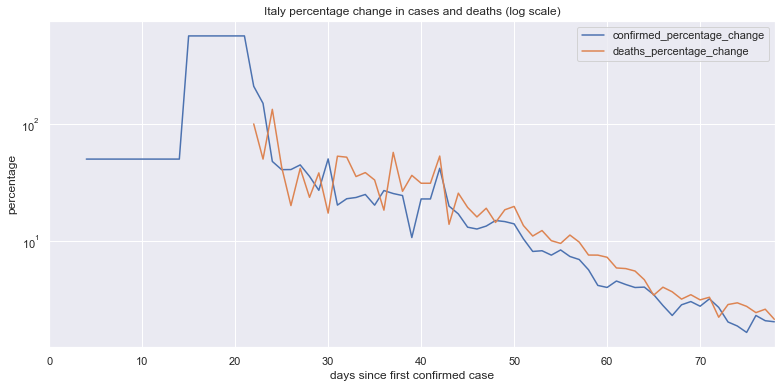

In [18]:
location_name = 'Italy'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# United States of America

,confirmed,deaths,recovered,confirmed_percentage_change,confirmed_percentage_change_by_half_mean_confirmed_cases_factor,deaths_percentage_change,deaths_percentage_change_by_half_mean_deaths_cases_factor
83,607670,25831,NaN,4.658993,254777.681022,9.788337,535276.560037
84,636350,28325,NaN,4.719667,258095.629356,9.655066,527988.579966
85,667801,32916,NaN,4.942406,270276.141082,16.208297,886352.907486
86,699706,36773,NaN,4.777621,261264.849211,11.717706,640784.332709
87,732197,38664,NaN,4.643522,253931.617792,5.142360,281210.651466


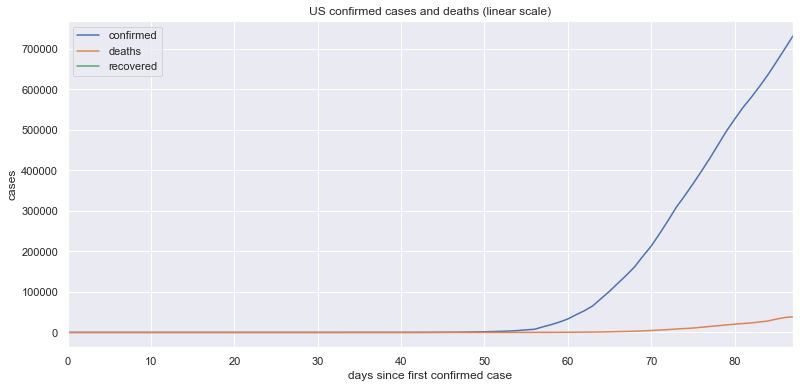

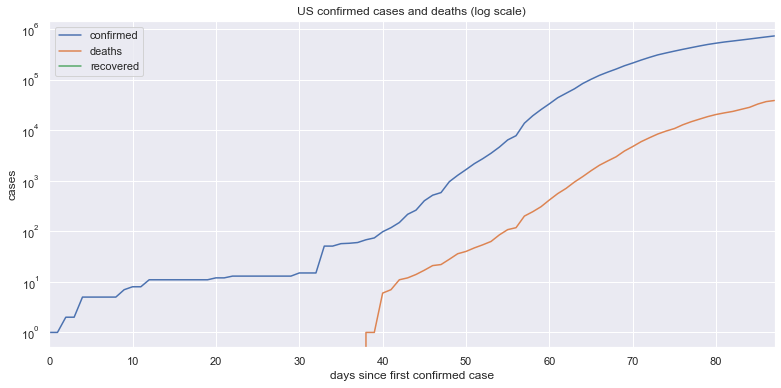

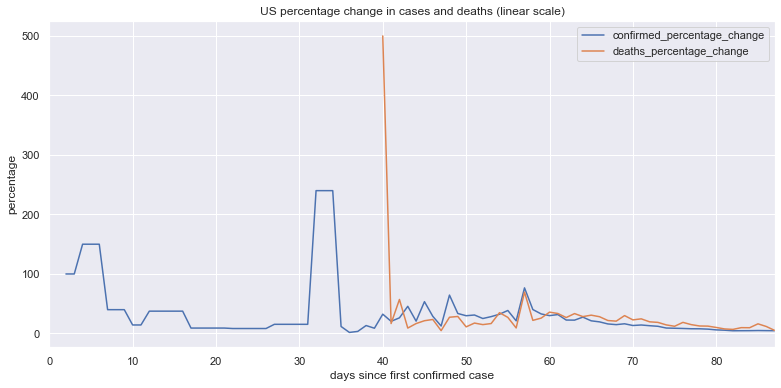

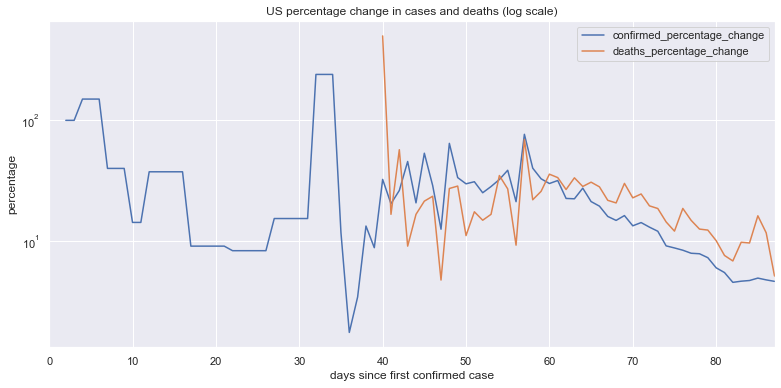

In [19]:
location_name = 'US'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

---

In [20]:
South_Korea              = locations['Korea, South']
Greece                   = locations['Greece']
Belgium                  = locations['Belgium']
Norway                   = locations['Norway']
Austria                  = locations['Austria']
Sweden                   = locations['Sweden']
Ireland                  = locations['Ireland']
United_Kingdom           = locations['United Kingdom']
Germany                  = locations['Germany']
Italy                    = locations['Italy']
United_States_of_America = locations['US']
Switzerland              = locations['Switzerland']

locations_list           = [South_Korea,
                            Belgium,
                            Greece,
                            Norway,
                            Austria,
                            Sweden,
                            Ireland,
                            United_Kingdom,
                            Germany,
                            Italy,
                            United_States_of_America,
                            Switzerland]

In [21]:
#South_Korea

In [22]:
_df = pd.merge( South_Korea.add_suffix('_South_Korea'), Sweden.add_suffix('_Sweden'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Ireland.add_suffix('_Ireland'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                     United_Kingdom.add_suffix('_United_Kingdom'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Germany.add_suffix('_Germany'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                       Italy.add_suffix('_Italy'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df, United_States_of_America.add_suffix('_United_States_of_America'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                     Greece.add_suffix('_Greece'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                     Norway.add_suffix('_Norway'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Austria.add_suffix('_Austria'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Belgium.add_suffix('_Belgium'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                           Switzerland.add_suffix('_Switzerland'), how='outer', left_index=True, right_index=True)
_df.tail()

,confirmed_South_Korea,deaths_South_Korea,recovered_South_Korea,confirmed_percentage_change_South_Korea,confirmed_percentage_change_by_half_mean_confirmed_cases_factor_South_Korea,deaths_percentage_change_South_Korea,deaths_percentage_change_by_half_mean_deaths_cases_factor_South_Korea,confirmed_Sweden,deaths_Sweden,recovered_Sweden,confirmed_percentage_change_Sweden,confirmed_percentage_change_by_half_mean_confirmed_cases_factor_Sweden,deaths_percentage_change_Sweden,deaths_percentage_change_by_half_mean_deaths_cases_factor_Sweden,confirmed_Ireland,deaths_Ireland,recovered_Ireland,confirmed_percentage_change_Ireland,confirmed_percentage_change_by_half_mean_confirmed_cases_factor_Ireland,deaths_percentage_change_Ireland,deaths_percentage_change_by_half_mean_deaths_cases_factor_Ireland,confirmed_United_Kingdom,deaths_United_Kingdom,recovered_United_Kingdom,confirmed_percentage_change_United_Kingdom,confirmed_percentage_change_by_half_mean_confirmed_cases_factor_United_Kingdom,deaths_percentage_change_United_Kingdom,deaths_percentage_change_by_half_mean_deaths_cases_factor_United_Kingdom,confirmed_Germany,deaths_Germany,recovered_Germany,confirmed_percentage_change_Germany,confirmed_percentage_change_by_half_mean_confirmed_cases_factor_Germany,deaths_percentage_change_Germany,deaths_percentage_change_by_half_mean_deaths_cases_factor_Germany,confirmed_Italy,deaths_Italy,recovered_Italy,confirmed_percentage_change_Italy,confirmed_percentage_change_by_half_mean_confirmed_cases_factor_Italy,deaths_percentage_change_Italy,deaths_percentage_change_by_half_mean_deaths_cases_factor_Italy,confirmed_United_States_of_America,deaths_United_States_of_America,recovered_United_States_of_America,confirmed_percentage_change_United_States_of_America,confirmed_percentage_change_by_half_mean_confirmed_cases_factor_United_States_of_America,deaths_percentage_change_United_States_of_America,deaths_percentage_change_by_half_mean_deaths_cases_factor_United_States_of_America,confirmed_Greece,deaths_Greece,recovered_Greece,confirmed_percentage_change_Greece,confirmed_percentage_change_by_half_mean_confirmed_cases_factor_Greece,deaths_percentage_change_Greece,deaths_percentage_change_by_half_mean_deaths_cases_factor_Greece,confirmed_Norway,deaths_Norway,recovered_Norway,confirmed_percentage_change_Norway,confirmed_percentage_change_by_half_mean_confirmed_cases_factor_Norway,deaths_percentage_change_Norway,deaths_percentage_change_by_half_mean_deaths_cases_factor_Norway,confirmed_Austria,deaths_Austria,recovered_Austria,confirmed_percentage_change_Austria,confirmed_percentage_change_by_half_mean_confirmed_cases_factor_Austria,deaths_percentage_change_Austria,deaths_percentage_change_by_half_mean_deaths_cases_factor_Austria,confirmed_Belgium,deaths_Belgium,recovered_Belgium,confirmed_percentage_change_Belgium,confirmed_percentage_change_by_half_mean_confirmed_cases_factor_Belgium,deaths_percentage_change_Belgium,deaths_percentage_change_by_half_mean_deaths_cases_factor_Belgium,confirmed_Switzerland,deaths_Switzerland,recovered_Switzerland,confirmed_percentage_change_Switzerland,confirmed_percentage_change_by_half_mean_confirmed_cases_factor_Switzerland,deaths_percentage_change_Switzerland,deaths_percentage_change_by_half_mean_deaths_cases_factor_Switzerland
83,10564,222,NaN,0.256240,646.215231,2.304147,5810.863532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,607670,25831,NaN,4.658993,254777.681022,9.788337,535276.560037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,10591,225,NaN,0.255585,644.563602,1.351351,3407.992936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,636350,28325,NaN,4.719667,258095.629356,9.655066,527988.579966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# comparisons: confirmed cases

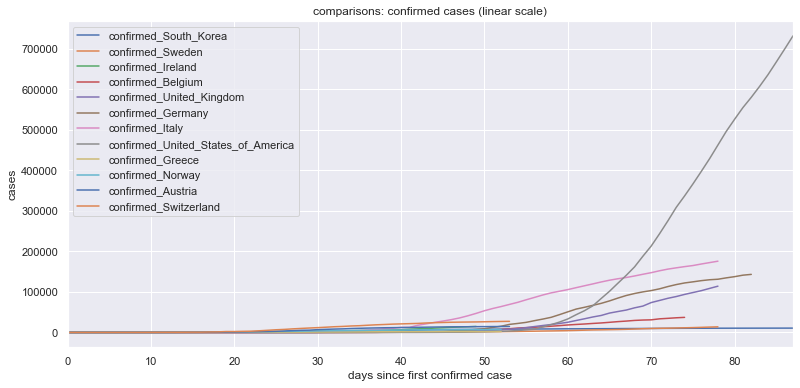

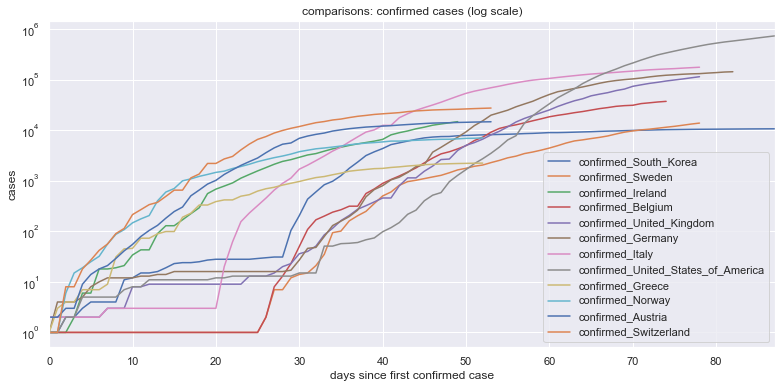

In [23]:
__df = _df[[
    'confirmed_South_Korea',
    'confirmed_Sweden',
    'confirmed_Ireland',
    'confirmed_Belgium',
    'confirmed_United_Kingdom',
    'confirmed_Germany',
    'confirmed_Italy',
    'confirmed_United_States_of_America',
    'confirmed_Greece',
    'confirmed_Norway',
    'confirmed_Austria',
    'confirmed_Switzerland']]

title = 'comparisons: confirmed cases'
__df.plot(title=title+' '+'(linear scale)')        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: deaths

,deaths_South_Korea,deaths_Sweden,deaths_Ireland,deaths_Belgium,deaths_United_Kingdom,deaths_Germany,deaths_Italy,deaths_United_States_of_America,deaths_Greece,deaths_Norway,deaths_Austria,deaths_Switzerland
83,222,NaN,NaN,NaN,NaN,NaN,NaN,25831,NaN,NaN,NaN,NaN
84,225,NaN,NaN,NaN,NaN,NaN,NaN,28325,NaN,NaN,NaN,NaN
85,229,NaN,NaN,NaN,NaN,NaN,NaN,32916,NaN,NaN,NaN,NaN
86,230,NaN,NaN,NaN,NaN,NaN,NaN,36773,NaN,NaN,NaN,NaN
87,232,NaN,NaN,NaN,NaN,NaN,NaN,38664,NaN,NaN,NaN,NaN


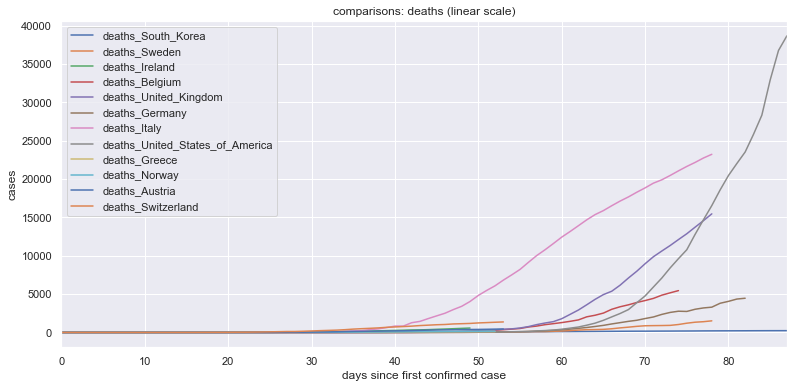

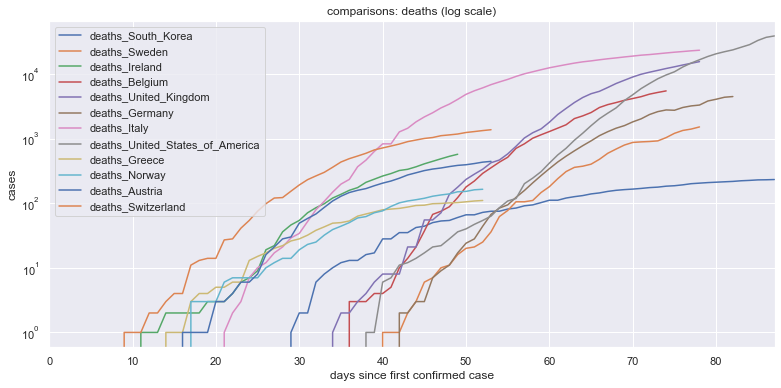

In [24]:
__df = _df[[
    'deaths_South_Korea',
    'deaths_Sweden',
    'deaths_Ireland',
    'deaths_Belgium',
    'deaths_United_Kingdom',
    'deaths_Germany',
    'deaths_Italy',
    'deaths_United_States_of_America',
    'deaths_Greece',
    'deaths_Norway',
    'deaths_Austria',
    'deaths_Switzerland']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)')        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

,deaths_Sweden,deaths_Belgium,deaths_Ireland,deaths_United_Kingdom,deaths_Germany,deaths_Italy,deaths_Greece,deaths_Norway,deaths_Austria,deaths_Switzerland
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


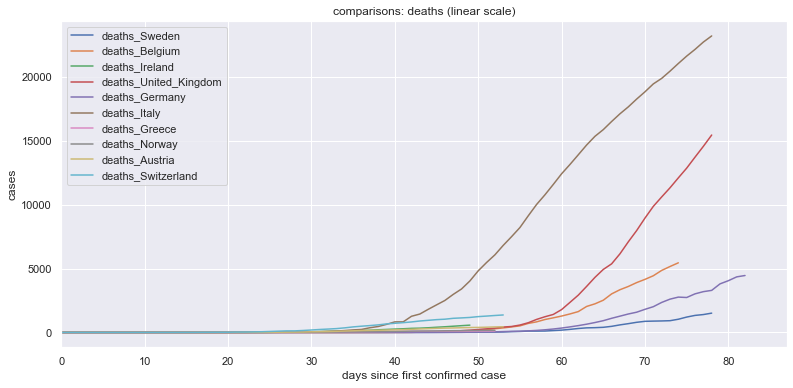

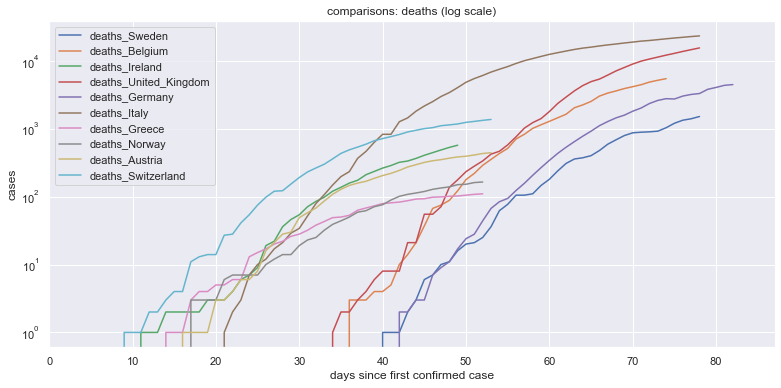

In [25]:
# some European countries
__df = _df[[
    'deaths_Sweden',
    'deaths_Belgium',
    'deaths_Ireland',
    'deaths_United_Kingdom',
    'deaths_Germany',
    'deaths_Italy',
    'deaths_Greece',
    'deaths_Norway',
    'deaths_Austria',
    'deaths_Switzerland']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)')        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: changes in confirmed cases

,confirmed_percentage_change_South_Korea,confirmed_percentage_change_Sweden,confirmed_percentage_change_Ireland,confirmed_percentage_change_Belgium,confirmed_percentage_change_United_Kingdom,confirmed_percentage_change_Germany,confirmed_percentage_change_Italy,confirmed_percentage_change_United_States_of_America,confirmed_percentage_change_Greece,confirmed_percentage_change_Norway,confirmed_percentage_change_Austria,confirmed_percentage_change_Switzerland
83,0.256240,NaN,NaN,NaN,NaN,NaN,NaN,4.658993,NaN,NaN,NaN,NaN
84,0.255585,NaN,NaN,NaN,NaN,NaN,NaN,4.719667,NaN,NaN,NaN,NaN
85,0.207724,NaN,NaN,NaN,NaN,NaN,NaN,4.942406,NaN,NaN,NaN,NaN
86,0.207293,NaN,NaN,NaN,NaN,NaN,NaN,4.777621,NaN,NaN,NaN,NaN
87,0.169252,NaN,NaN,NaN,NaN,NaN,NaN,4.643522,NaN,NaN,NaN,NaN


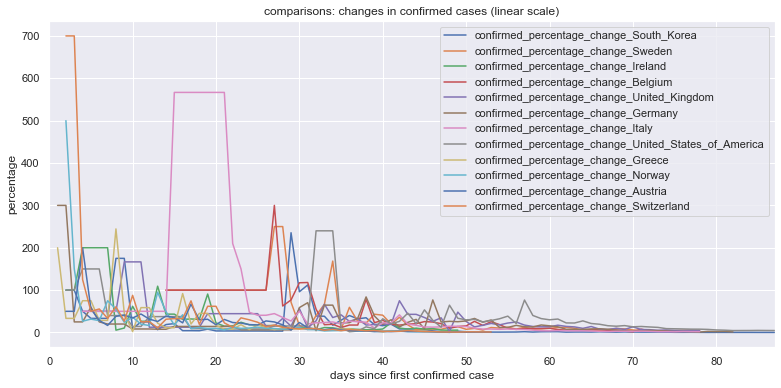

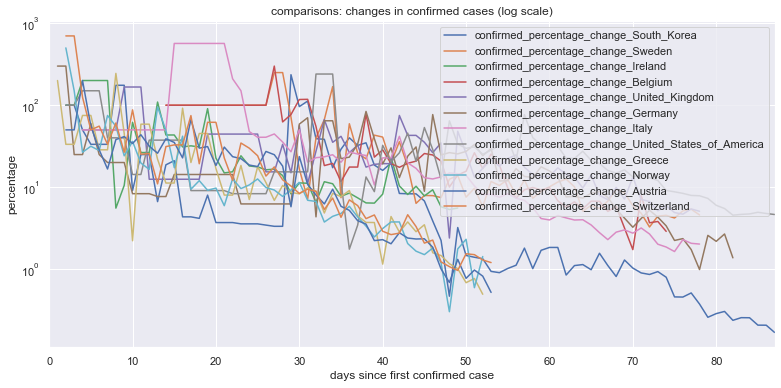

In [26]:
__df = _df[[
    'confirmed_percentage_change_South_Korea',
    'confirmed_percentage_change_Sweden',
    'confirmed_percentage_change_Ireland',
    'confirmed_percentage_change_Belgium',
    'confirmed_percentage_change_United_Kingdom',
    'confirmed_percentage_change_Germany',
    'confirmed_percentage_change_Italy',
    'confirmed_percentage_change_United_States_of_America',
    'confirmed_percentage_change_Greece',
    'confirmed_percentage_change_Norway',
    'confirmed_percentage_change_Austria',
    'confirmed_percentage_change_Switzerland']]
display(__df.tail())

title = 'comparisons: changes in confirmed cases'
__df.plot(title=title+' '+'(linear scale)')        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
__df.plot(title=title+' '+'(log scale)', logy=True); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

,deaths_percentage_change_South_Korea,deaths_percentage_change_Sweden,deaths_percentage_change_Ireland,deaths_percentage_change_Belgium,deaths_percentage_change_United_Kingdom,deaths_percentage_change_Germany,deaths_percentage_change_Italy,deaths_percentage_change_United_States_of_America,deaths_percentage_change_Greece,deaths_percentage_change_Norway,deaths_percentage_change_Austria,deaths_percentage_change_Switzerland
83,2.304147,NaN,NaN,NaN,NaN,NaN,NaN,9.788337,NaN,NaN,NaN,NaN
84,1.351351,NaN,NaN,NaN,NaN,NaN,NaN,9.655066,NaN,NaN,NaN,NaN
85,1.777778,NaN,NaN,NaN,NaN,NaN,NaN,16.208297,NaN,NaN,NaN,NaN
86,0.436681,NaN,NaN,NaN,NaN,NaN,NaN,11.717706,NaN,NaN,NaN,NaN
87,0.869565,NaN,NaN,NaN,NaN,NaN,NaN,5.142360,NaN,NaN,NaN,NaN


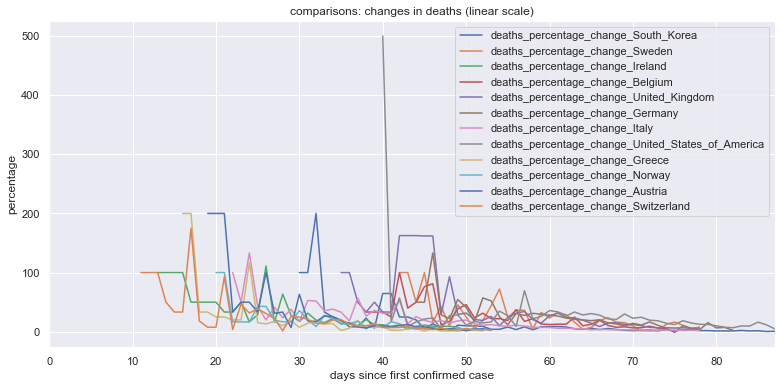

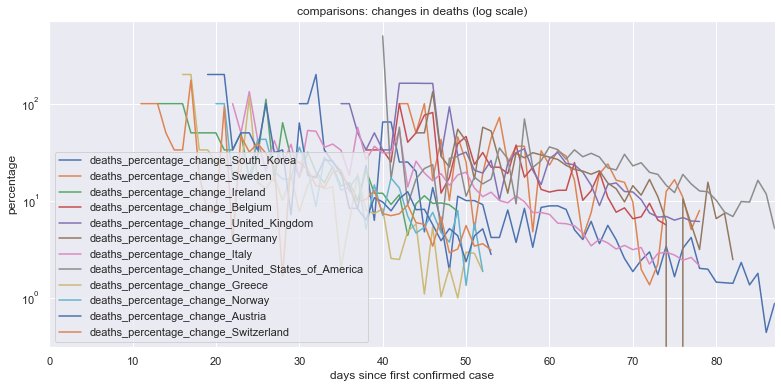

In [27]:
___df = _df[[
    'deaths_percentage_change_South_Korea',
    'deaths_percentage_change_Sweden',
    'deaths_percentage_change_Ireland',
    'deaths_percentage_change_Belgium',
    'deaths_percentage_change_United_Kingdom',
    'deaths_percentage_change_Germany',
    'deaths_percentage_change_Italy',
    'deaths_percentage_change_United_States_of_America',
    'deaths_percentage_change_Greece',
    'deaths_percentage_change_Norway',
    'deaths_percentage_change_Austria',
    'deaths_percentage_change_Switzerland']]
display(___df.tail())

title = 'comparisons: changes in deaths'
___df.plot(title=title+' '+'(linear scale)')        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
___df.plot(title=title+' '+'(log scale)', logy=True); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

,deaths_percentage_change_Sweden,deaths_percentage_change_Belgium,deaths_percentage_change_Ireland,deaths_percentage_change_United_Kingdom,deaths_percentage_change_Germany,deaths_percentage_change_Italy,deaths_percentage_change_Greece,deaths_percentage_change_Norway,deaths_percentage_change_Austria,deaths_percentage_change_Switzerland
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


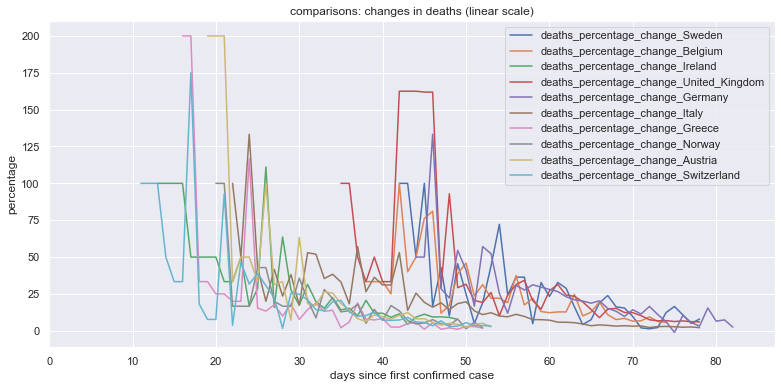

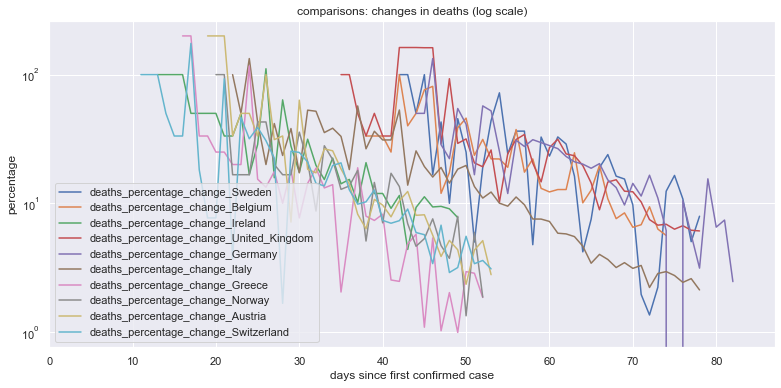

In [28]:
# some European countries
___df = _df[[
    'deaths_percentage_change_Sweden',
    'deaths_percentage_change_Belgium',
    'deaths_percentage_change_Ireland',
    'deaths_percentage_change_United_Kingdom',
    'deaths_percentage_change_Germany',
    'deaths_percentage_change_Italy',
    'deaths_percentage_change_Greece',
    'deaths_percentage_change_Norway',
    'deaths_percentage_change_Austria',
    'deaths_percentage_change_Switzerland']]
display(___df.tail())

title = 'comparisons: changes in deaths'
___df.plot(title=title+' '+'(linear scale)')        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
___df.plot(title=title+' '+'(log scale)', logy=True); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');